# 1. EDA
## 1.1. Analysis

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the dataset
avdata = pd.read_csv("attrition_availabledata_17.csv")
compt = pd.read_csv("attrition_competition_17.csv")

In [3]:
print(avdata.shape)
print(compt.shape)

(2940, 31)
(1470, 30)


In [4]:
# Define a list for column names
colnames_av = list(avdata)
colnames_co = list(compt)

print(colnames_av)

# Print the unique values for each column
for col in colnames_av:
    print(col, "          ", set(avdata[col]))


['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']
hrs            {7.472212182061389, 5.976567380633611, 5.832150825524167, 7.386420124944166, 7.56177264614, 9.113384649709722, 9.52423136992389, 7.0466030789825, 5.650391566265, 5.755578982596944, 6.207484381972222, 6.110232039268055, 7.438930165104722, 8.011686746987777, 9.76839245872361, 10.541623159303612, 5.6010040160641665, 5.971953369031667, 5.722452030343334, 6.743695894689722, 6.235760821061945, 6.634693217313611, 6.319837126282778, 6.294146586345278, 7.32136

In [5]:
print(len(set(avdata["NumCompaniesWorked"])))
print(len(set(avdata["PercentSalaryHike"])))
print(len(set(avdata["TrainingTimesLastYear"])))

10
15
7


The *availabledata* has 31 columns nd 2940 rows, whereas the *competition* has 30 columns and 1470 rows. All of the columns are the same; however, the *availabledata* has an extra column named *attrition*.

When the data is further examined, we can see that the variables are of the following types:

| Variable Name                 | Variable Type | Cardinality, if not numerical |
|--------------------------|----------|----------|
| hrs                      | Numerical     |      |
| absences                 | Numerical     |      |
| JobInvolvement           | Categorical     | 4     |
| PerformanceRating        | Categorical     | 2     |
| EnvironmentSatisfaction  | Categorical     | 4     |
| JobSatisfaction          | Categorical     | 4     |
| WorkLifeBalance          | Categorical     | 4     |
| Age                      | Numerical     |      |
| BusinessTravel           | Categorical     | 3     |
| Department               | Categorical     | 3     |
| DistanceFromHome         | Numerical     |      |
| Education                | Categorical     | 5     |
| EducationField           | Categorical     | 6     |
| EmployeeCount            | Constant Column     |  1    |
| EmployeeID               | ID Column     |      |
| Gender                   | Binary     |    2  |
| JobLevel                 | Categorical     | 5     |
| JobRole                  | Categorical     | 9     |
| MaritalStatus            | Categorical     | 3     |
| MonthlyIncome            | Numerical     |      |
| NumCompaniesWorked       | Numerical     |      |
| Over18                   | Constant Column     |    1  |
| PercentSalaryHike        | Numerical     |      |
| StandardHours            | Constant Column     |     1 |
| StockOptionLevel         | Categorical     | 4     |
| TotalWorkingYears        | Numerical     |      |
| TrainingTimesLastYear    | Numerical     |      |
| YearsAtCompany           | Numerical     |      |
| YearsSinceLastPromotion  | Numerical     |      |
| YearsWithCurrManager     | Numerical     |      |
| Attrition                | Binary     |  2    |




We can see that some categorical variables have high cardinality. Namely; *absences* (24), *JobRole* (9), *NumCompaniesWorked* (10), and *PercentSalaryHike* (15).

Now let us see if there are any missing values.

In [6]:
missing_av = avdata.isnull().sum()
print(missing_av)

missing_compt = compt.isnull().sum()
print(missing_compt)

hrs                        0
absences                   0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
Attrition                  0
dtype: int64
hrs                        0
absences                   0
JobInvolvement             0
P

There are **no missing values** in either of the datasets.


The target column is a binary variable, making this problem a **classification** problem. Let us check if it is balanced or not.

In [7]:
# Count the values for attrition
attrition_counts = avdata['Attrition'].value_counts()
print(attrition_counts)

# Calculate class proportions
class_proportions = attrition_counts / len(avdata)
print(class_proportions)

Attrition
No     2466
Yes     474
Name: count, dtype: int64
Attrition
No     0.838776
Yes    0.161224
Name: count, dtype: float64


We can see that only 16% of the attrition data is *Yes*, making it **imbalanced**.

In [8]:
numerical_vars = [
    "hrs",
    "absences",
    "Age",
    "DistanceFromHome",
    "MonthlyIncome",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

binary_vars = [
    "Gender",
    "Attrition"
]

categorical_vars = [
    "JobInvolvement",
    "PerformanceRating",
    "EnvironmentSatisfaction",
    "JobSatisfaction",
    "WorkLifeBalance",
    "BusinessTravel",
    "Department",
    "Education",
    "EducationField",
    "JobLevel",
    "JobRole",
    "MaritalStatus",
    "StockOptionLevel"
]

# Loop through categorical variables to calculate proportions
for col in categorical_vars:
    print(f"Proportions for {col}:")
    proportions = avdata[col].value_counts(normalize=True)  # Calculate proportions
    print(proportions)
    print("-" * 50)  # Separator for readability


Proportions for JobInvolvement:
JobInvolvement
3.0    0.590136
2.0    0.258163
4.0    0.098980
1.0    0.052721
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for PerformanceRating:
PerformanceRating
3.0    0.841837
4.0    0.158163
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for EnvironmentSatisfaction:
EnvironmentSatisfaction
4.0    0.313265
3.0    0.303741
1.0    0.197959
2.0    0.185034
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for JobSatisfaction:
JobSatisfaction
4.0    0.305782
3.0    0.302721
1.0    0.199320
2.0    0.192177
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for WorkLifeBalance:
WorkLifeBalance
3.0    0.606463
2.0    0.235714
4.0    0.101020
1.0    0.056803
Name: proportion, dtype: float64
--------------------------------------------------
Proportions for BusinessTrave

In [9]:
# import matplotlib.pyplot as plt

# # Loop through categorical variables to create pie charts
# for col in categorical_vars:
#     # Get the value counts and their proportions
#     proportions = avdata[col].value_counts(normalize=True)
    
#     # Plotting the pie chart
#     plt.figure(figsize=(2, 2))
#     proportions.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
#     plt.title(f"Proportions for {col}")
#     plt.ylabel('')  # Hide the y-axis label
#     plt.show()


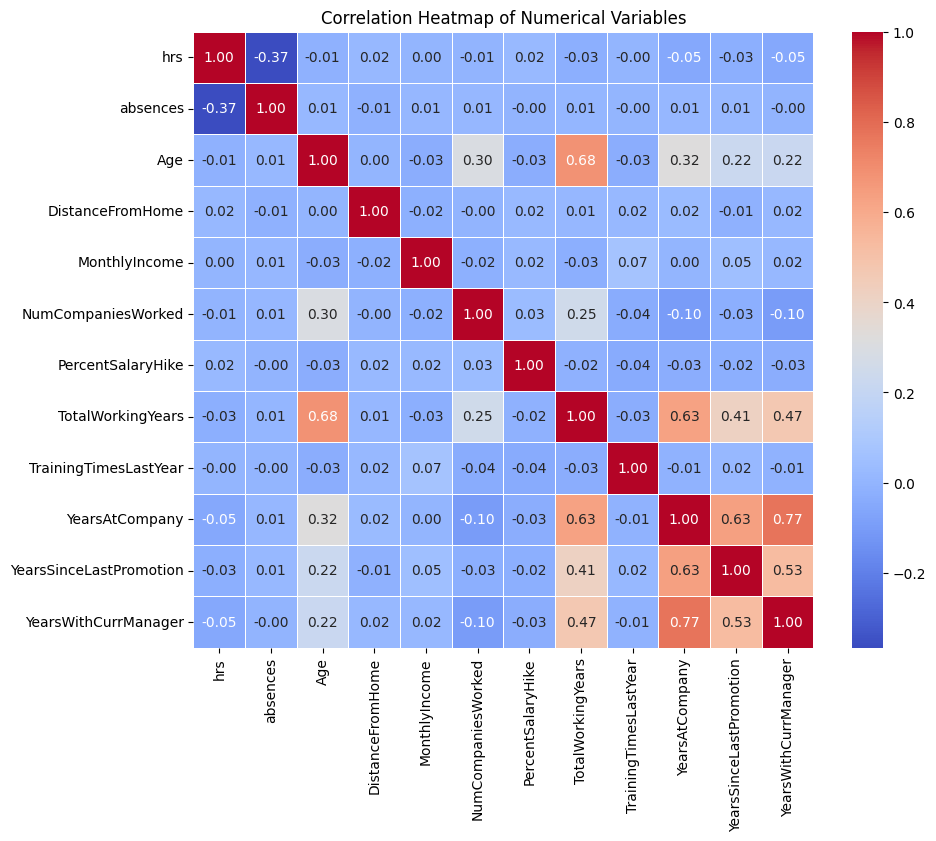

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = avdata[numerical_vars].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


In [11]:
# # For continuous variables vs Attrition
# for num_col in numerical_vars:
#     plt.figure(figsize=(3, 2))
#     sns.boxplot(x=avdata['Attrition'], y=avdata[num_col], palette="Set3")
#     plt.title(f"Boxplot of {num_col} by Attrition")
#     plt.show()

#     # You can also use violin plots instead of boxplots
#     plt.figure(figsize=(3, 2))
#     sns.violinplot(x=avdata['Attrition'], y=avdata[num_col], palette="Set3")
#     plt.title(f"Violin plot of {num_col} by Attrition")
#     plt.show()

# # For categorical variables vs Attrition
# for cat_col in categorical_vars:
#     plt.figure(figsize=(3, 2))
#     sns.countplot(x=avdata[cat_col], hue=avdata['Attrition'], palette="Set2")
#     plt.title(f"Count plot of {cat_col} by Attrition")
#     plt.xticks(rotation=45)
#     plt.show()


Make these into sensible sentences.

Job involvement
59% 3.0

Performance rating
Either 3 or 4, 84% 3.0

Environment Satisfaction, Job Satisfaction 
Balanced

WorkLifeBalance
60% 3.0

BusinessTravel
71% travels rarely

Department
66% R&D

Education
3 39%, 4 28%

Education Field
Life Sci 40%, medical 32%

JobLevel
1 38%, 2 35.8%


## 1.2. Minor Changes to the Original Dataset
Lastly, we will need to drop constant variables and the ID column.

In [ ]:
avdata = avdata.drop(columns = ["EmployeeID", "EmployeeCount", "Over18", "StandardHours"])

# # Make categorical values categorical
# avdata[categorical_vars] = avdata[categorical_vars].astype('category')

# # Convert binary variables to 0 and 1
# avdata['Attrition'] = avdata['Attrition'].map({'No': 0, 'Yes': 1})  # Example for Attrition
# avdata['Gender'] = avdata['Gender'].map({'Male': 0, 'Female': 1})  # Example for Gender

# # Verify the conversion
# print(avdata.dtypes)

In [ ]:
X_df = avdata.drop('Attrition', axis= 1)
y_df = avdata["Attrition"]

# 2. Setup
## 2.1. Dummy

In [ ]:
@TODO

## 2.2 KNN with default hyper-parameters, with one scaler 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer

# Binary conversion function
def binary_conversion(df):
    df['Attrition'] = df['Attrition'].map({'No': 0, 'Yes': 1})
    df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
    return df

# Create the numerical transformer
numerical_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Create the categorical transformer
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Create the column transformer for the entire dataset
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_vars),
        ("cat", categorical_transformer, categorical_vars)
    ]
)

# Create a pipeline that first applies the binary conversion and then the preprocessor
pipeline = Pipeline(steps=[
    ("binary_conversion", FunctionTransformer(lambda x: binary_conversion(x), validate=False)),
    ("preprocessor", preprocessor)
])

# Apply the pipeline to the data
X = pipeline.fit_transform(X_df)

# Check the preprocessed data
print(X)


[[-0.83728555 -0.84244227  1.31488118 ...  0.          0.
   0.        ]
 [ 1.33435039 -0.84244227  1.42467869 ...  1.          0.
   0.        ]
 [-0.3657772   0.78179428  0.32670361 ...  0.          0.
   0.        ]
 ...
 [-0.45053177  1.86461864  0.87569115 ...  0.          0.
   0.        ]
 [ 0.46785033  0.05991137 -0.22228394 ...  1.          0.
   0.        ]
 [ 2.12413452 -1.92526663  0.2169061  ...  1.          0.
   0.        ]]


In [ ]:
print(list(avdata))
print(len(list(avdata)))

print(list(X))
print(len(list(X)))

['hrs', 'absences', 'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']
27
[array([-0.83728555, -0.84244227,  1.31488118,  1.47943293, -0.87206356,
        0.53523666, -0.60819135,  1.50759579,  0.12710877,  0.16942845,
       -0.6786689 , -1.17342345,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        , 

        hrs  absences       Age  DistanceFromHome  MonthlyIncome  \
0 -0.837286 -0.842442  1.314881          1.479433      -0.872064   
1  1.334350 -0.842442  1.424679         -0.647784      -0.783042   
2 -0.365777  0.781794  0.326704         -1.023175      -0.574617   
3 -0.322372  0.781794 -0.881069         -0.522654      -0.287793   
4  0.043324  0.059911 -1.320259          2.480476      -0.725677   

   NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0            0.535237          -0.608191           1.507596   
1            0.535237          -0.878458           2.020286   
2            1.747871          -0.878458          -0.543163   
3            0.535237          -1.148724          -0.414991   
4           -0.273187          -0.337925          -0.671336   

   TrainingTimesLastYear  YearsAtCompany  ...  JobRole_Research Scientist  \
0               0.127109        0.169428  ...                         0.0   
1              -2.198823       -0.989374  ...             